In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


변수(feature, variable)	/ 정의 / 설명 / 타입

survival / 생존여부 / target label 임. 1, 0 으로 표현됨 / integer

Pclass / 티켓의 클래스 / 1 = 1st, 2 = 2nd, 3 = 3rd 클래스로 나뉘며 categorical feature	 / integer

sex / 성별 / male, female 로 구분되며 binary / string

Age / 나이 / continuous / integer

sibSp / 함께 탑승한 형제와 배우자의 수 / quantitative / integer

parch / 함께 탑승한 부모, 아이의 수 / quantitative / integer

ticket / 티켓 번호 / alphabat + integer / string

fare / 탑승료 / continuous / float

cabin / 객실 번호 / alphabat + integer / string

embared / 탑승 항구 / C = Cherbourg, Q = Queenstown, S = Southampton / string

In [2]:
df_train = pd.read_csv("./train.csv")
df_test = pd.read_csv("./test.csv")

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1.1 Null data check

In [49]:
# train의 컬럼별 결측치 비율
for col in df_train.columns:
    msg = 'columns: {:>10}\t Percent of NaN value: {:.2f}%'.format(
        col, 100*(df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

columns: PassengerId	 Percent of NaN value: 0.00%
columns:   Survived	 Percent of NaN value: 0.00%
columns:     Pclass	 Percent of NaN value: 0.00%
columns:       Name	 Percent of NaN value: 0.00%
columns:        Sex	 Percent of NaN value: 0.00%
columns:        Age	 Percent of NaN value: 19.87%
columns:      SibSp	 Percent of NaN value: 0.00%
columns:      Parch	 Percent of NaN value: 0.00%
columns:     Ticket	 Percent of NaN value: 0.00%
columns:       Fare	 Percent of NaN value: 0.00%
columns:      Cabin	 Percent of NaN value: 77.10%
columns:   Embarked	 Percent of NaN value: 0.22%


In [50]:
# test의 컬럼별 결측치 비율
for col in df_test.columns:
    msg = 'columns : {:<10}\t Percent of NaN value: {:.2f}%'.format(
        col, 100*(df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

columns : PassengerId	 Percent of NaN value: 0.00%
columns : Pclass    	 Percent of NaN value: 0.00%
columns : Name      	 Percent of NaN value: 0.00%
columns : Sex       	 Percent of NaN value: 0.00%
columns : Age       	 Percent of NaN value: 20.57%
columns : SibSp     	 Percent of NaN value: 0.00%
columns : Parch     	 Percent of NaN value: 0.00%
columns : Ticket    	 Percent of NaN value: 0.00%
columns : Fare      	 Percent of NaN value: 0.24%
columns : Cabin     	 Percent of NaN value: 78.23%
columns : Embarked  	 Percent of NaN value: 0.00%


<Axes: >

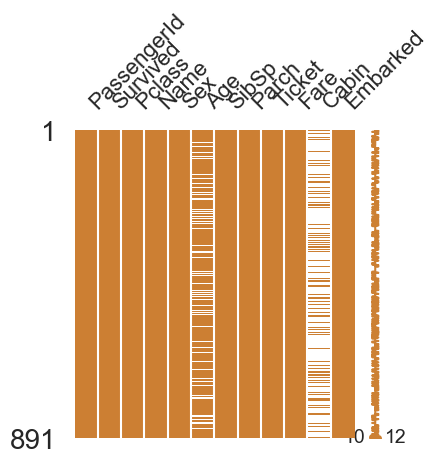

In [55]:
msno.matrix(df=df_train.iloc[:, :], figsize=(4,4), color=(0.8, 0.5, 0.2))

<Axes: >

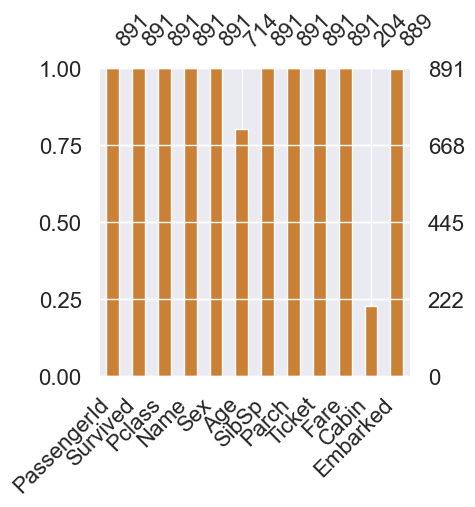

In [54]:
msno.bar(df=df_train.iloc[:, :], figsize=(4, 4), color=(0.8, 0.5, 0.2))

<Axes: >

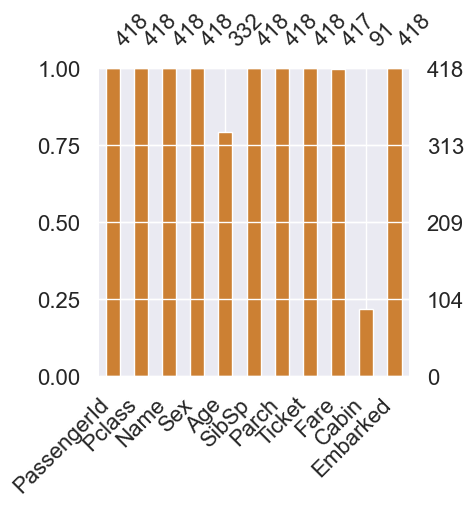

In [56]:
msno.bar(df_test.iloc[:,:], figsize=(4,4), color=(0.8,0.5,0.2))

## 1.2 Target label 확인

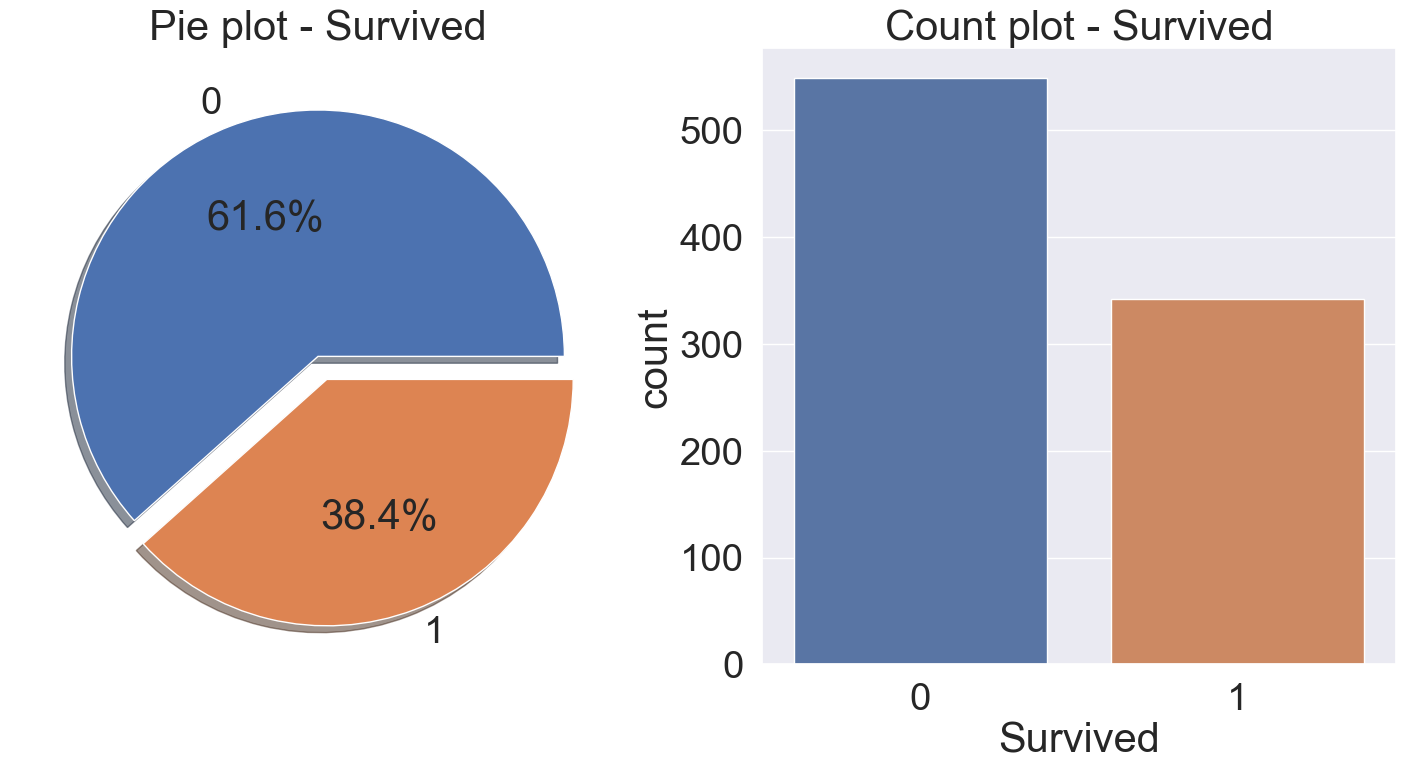

In [64]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
# 이미 data 매개변수가 설정되어있어 발생
# Survived도 하나의 매개변수로 인식해서 오류발생
sns.countplot(x='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

## 2. Exploratory data analysis (탐색적 데이터 분석)

- Pclass는 ordinal, 서수형 데이터입니다. 카테고리이면서,순서가 있는 데이터타입
- 엑셀의 피벗차트와 유사한 작업을 할수있다
- 피봇 메서드도 있다. 예시) df_train.pivot("Pclass","Survived")

In [69]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [70]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [71]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<Axes: xlabel='Pclass'>

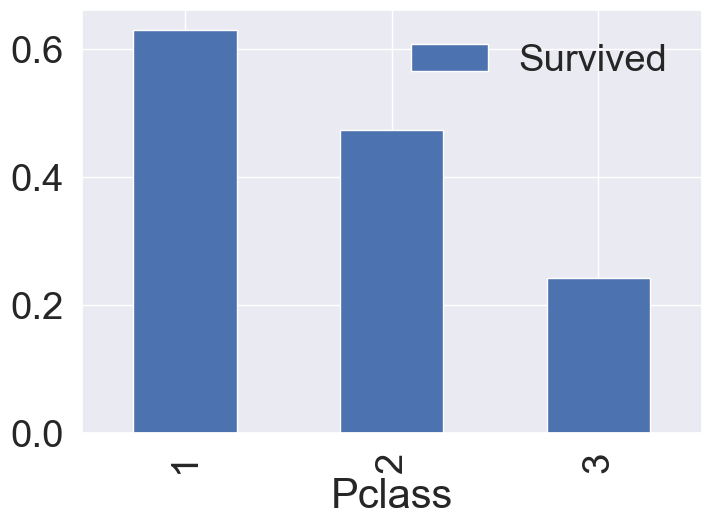

In [74]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean()\
    .sort_values(by='Survived', ascending=False).plot.bar()

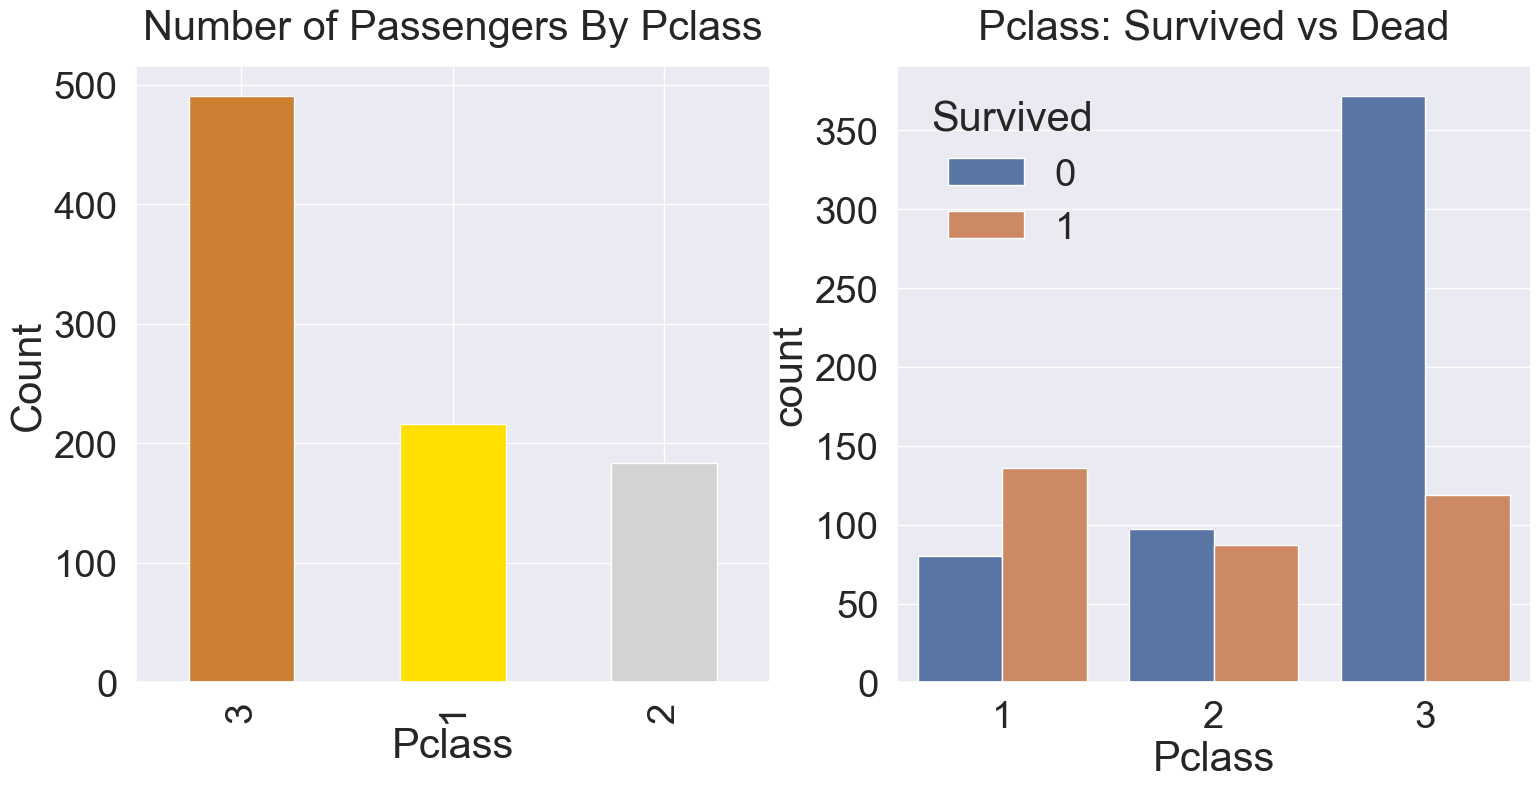

In [89]:
y_position = 1.03
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

## 2.2 Sex
- 성별에 따른 생존률

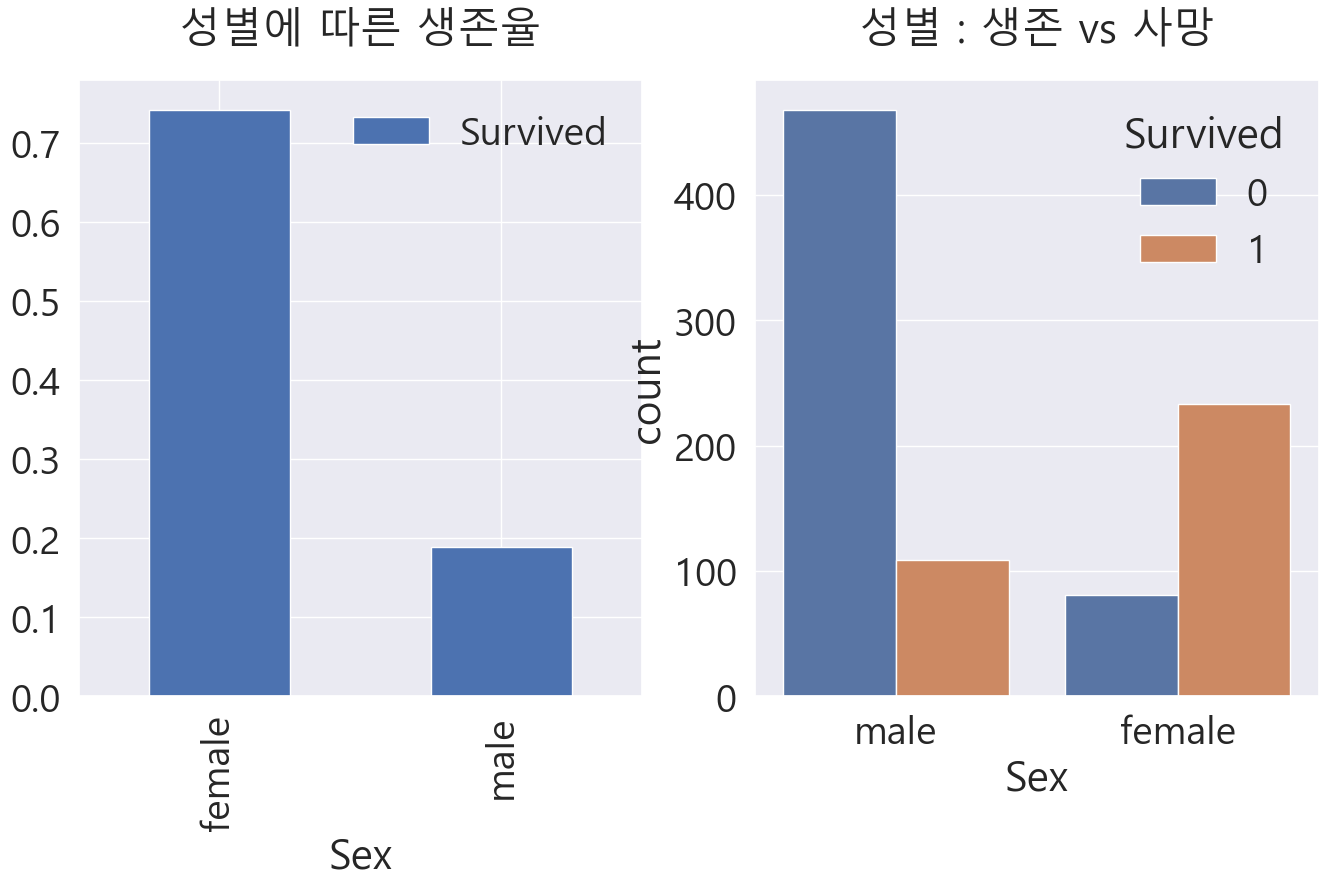

In [110]:
y_position = 1.05
f, ax = plt.subplots(1, 2, figsize=(16,8))
df_train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('성별에 따른 생존율', y=y_position)
sns.countplot(x='Sex',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title("성별 : 생존 vs 사망", y=y_position)
plt.show()

In [112]:
# 생존자 중 성별 비율
df_train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [114]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


## 2.3 Both Sex and Pclass

- 성별과 좌석등급에 따라 어떻게 생존이 달라지는지 확인

<Axes: xlabel='Pclass', ylabel='Survived'>

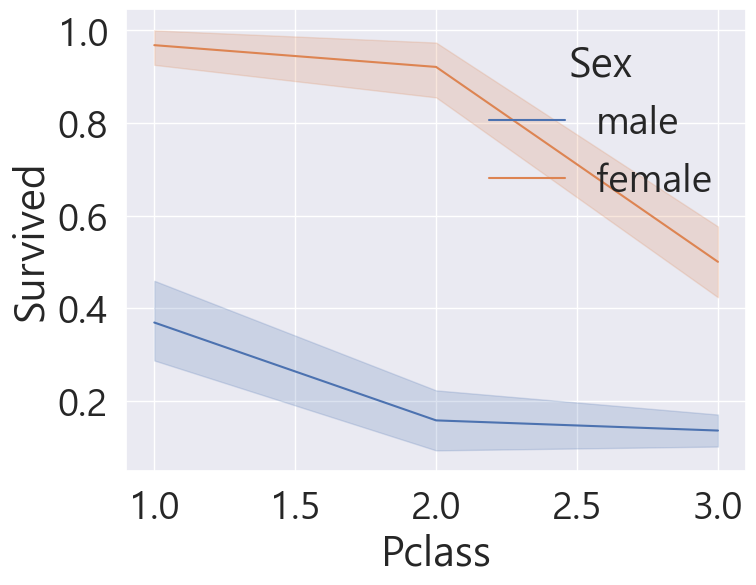

In [161]:
fig = plt.figure(figsize=(8, 6))
sns.lineplot(x='Pclass', y='Survived', hue='Sex', data=df_train)

## 2.4 Age
- 나이별 생존율

In [162]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


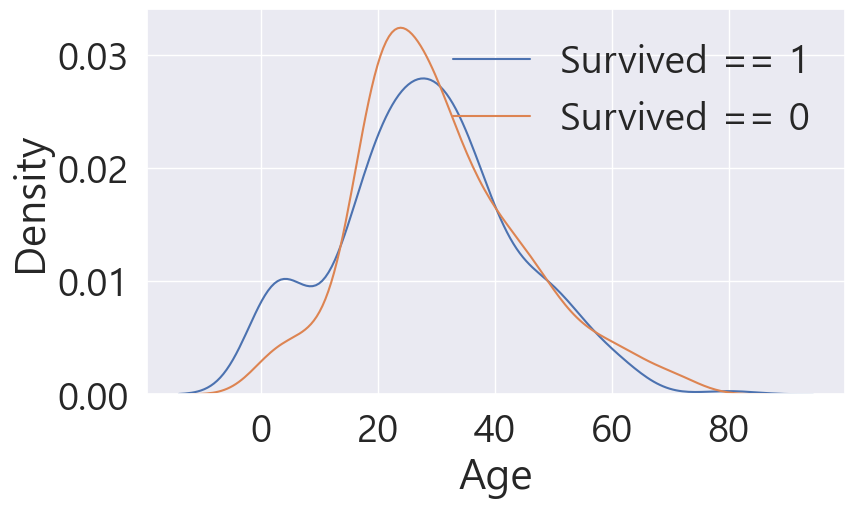

In [163]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

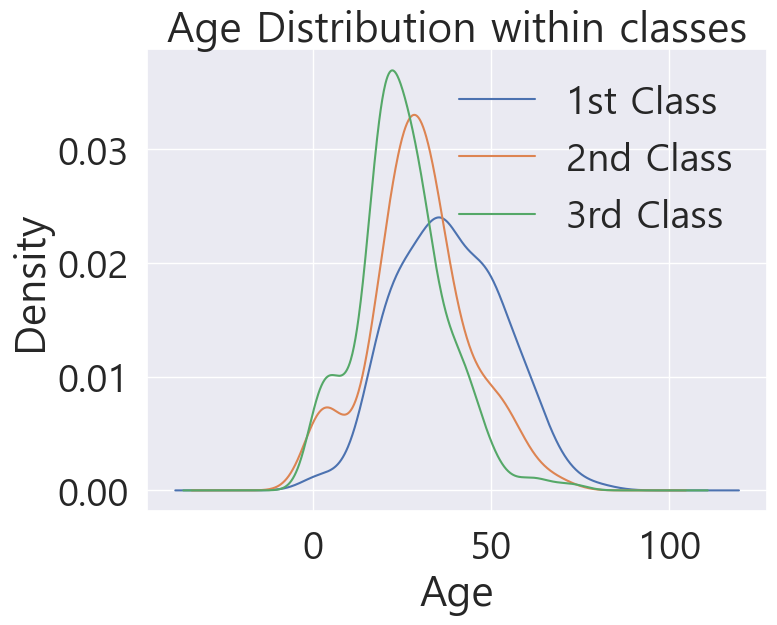

In [164]:
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

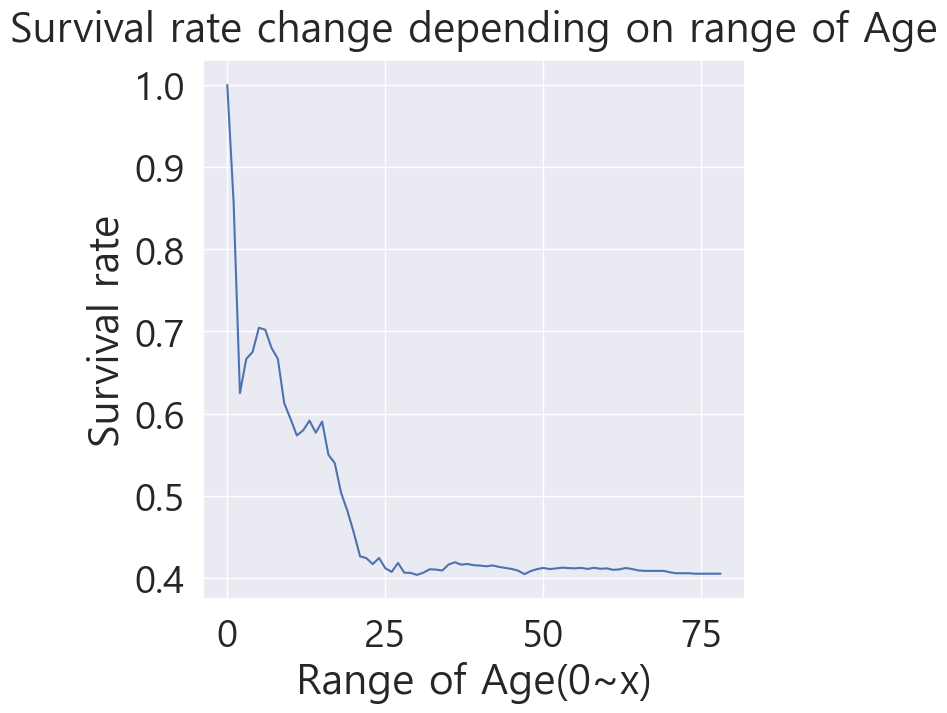

In [165]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

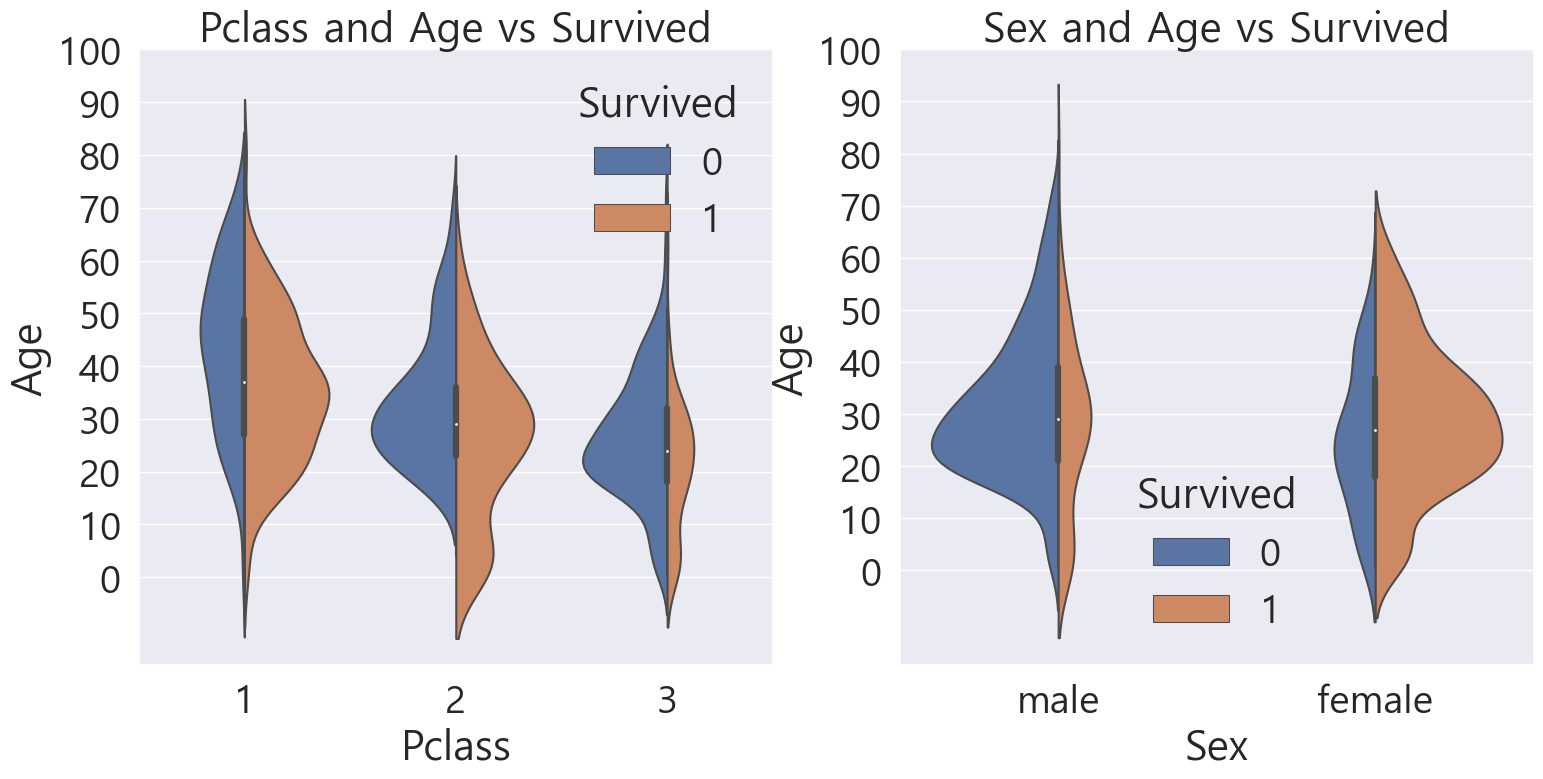

In [168]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x="Pclass",y="Age", hue="Survived", data=df_train, scale='count', split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="Sex",y="Age", hue="Survived", data=df_train, scale='count', split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

## 2.6 Embarked
- 탑승한 항구

<Axes: xlabel='Embarked'>

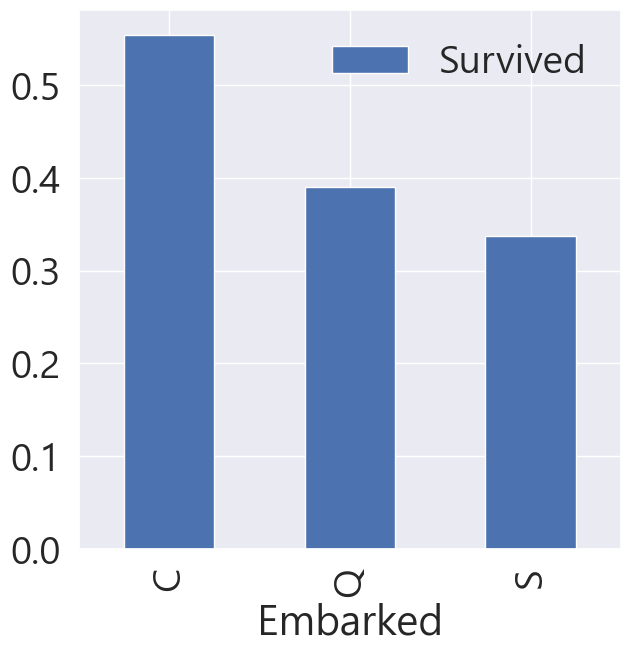

In [169]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

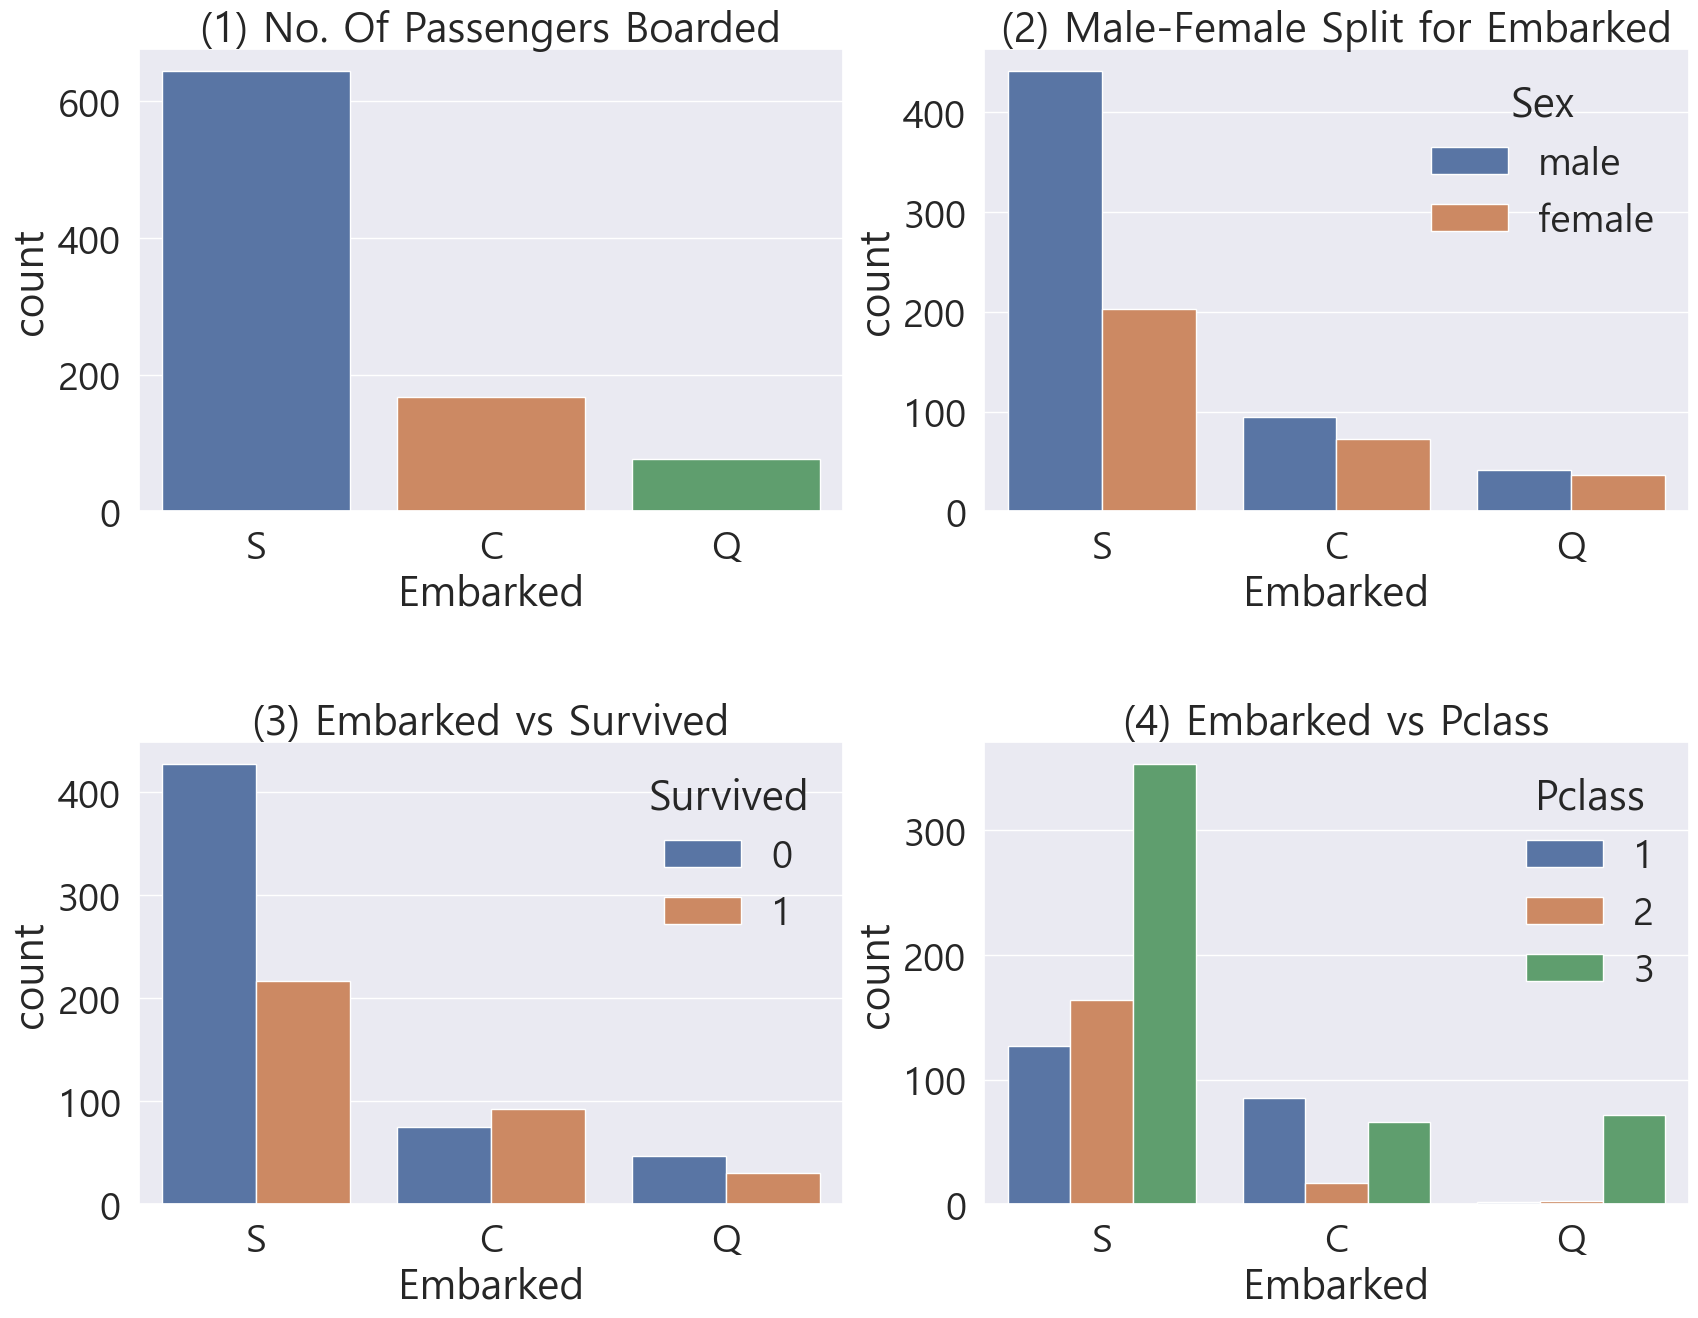

In [171]:
f,ax=plt.subplots(2, 2, figsize=(20,15))
sns.countplot(x='Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot(x='Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot(x='Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot(x='Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## 2.7 Family - SibSp(형제 자매) + Parch(부모,자녀)
- SibSp + Parch = Family

In [172]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다

In [173]:
print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


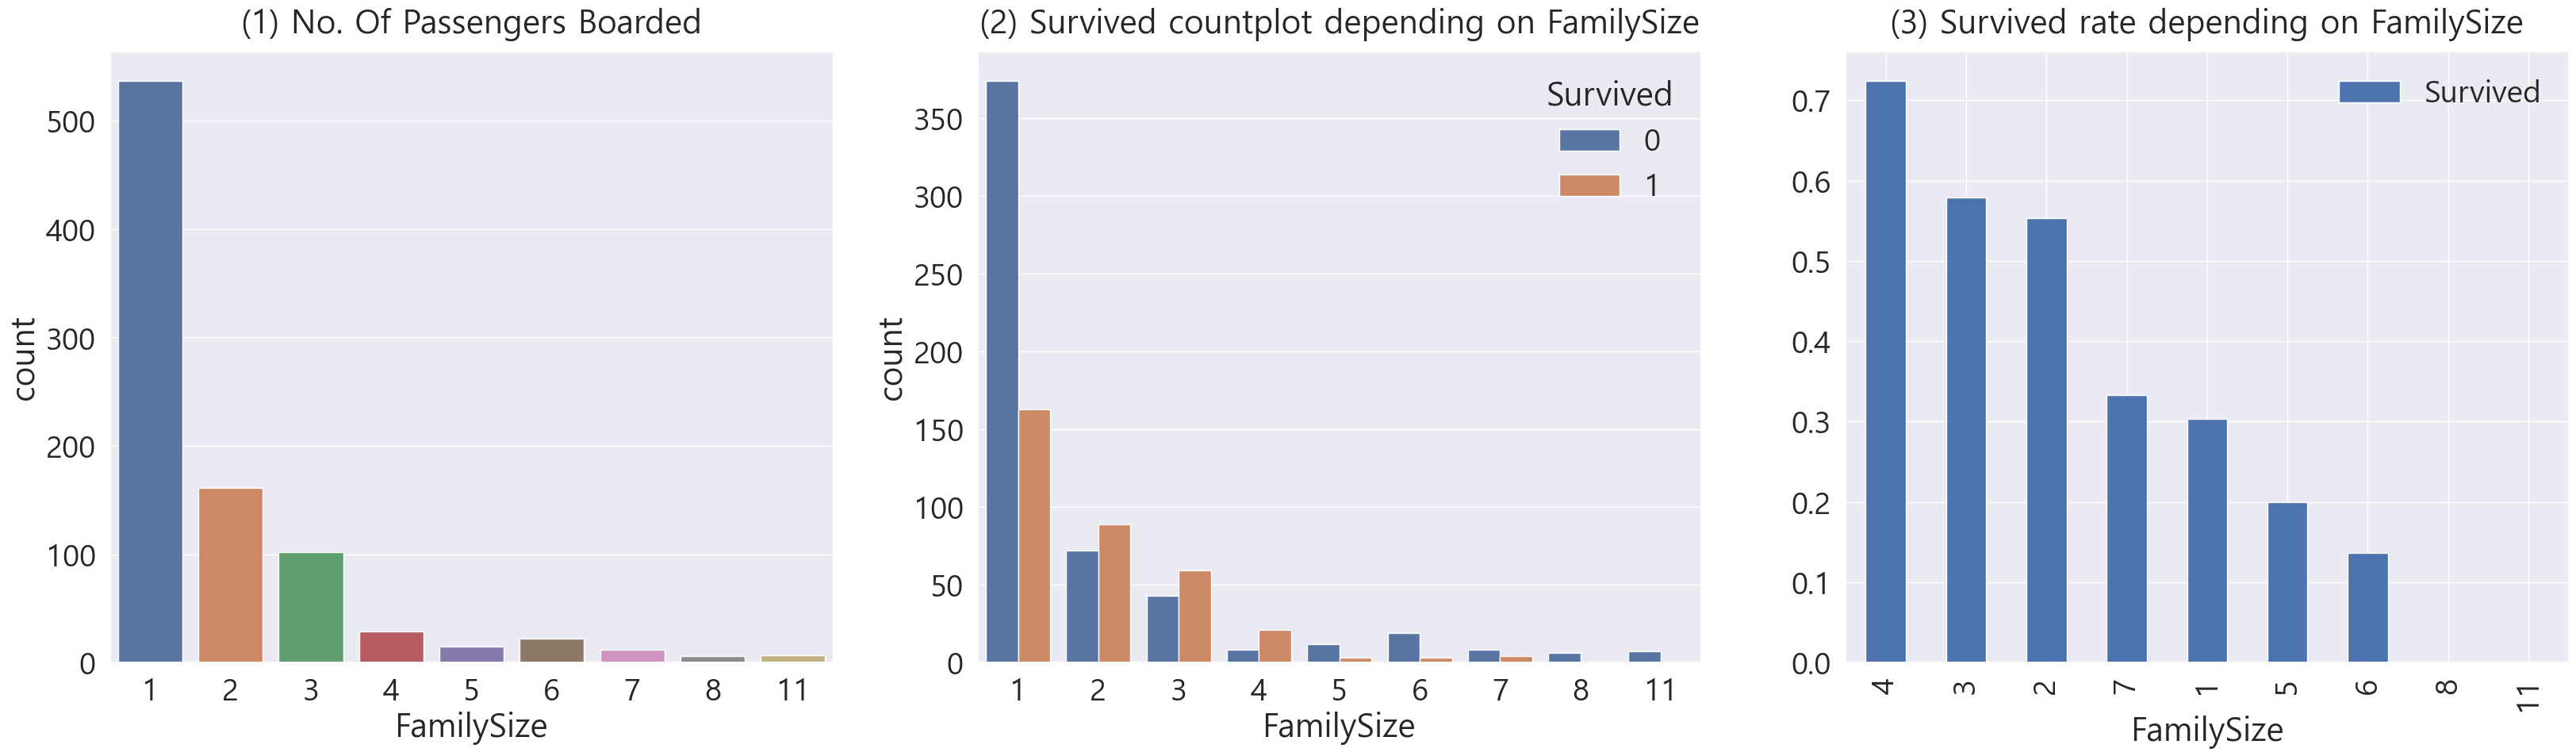

In [175]:
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot(x='FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot(x='FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## 2.8 Fare
- Fare : 탑승요금

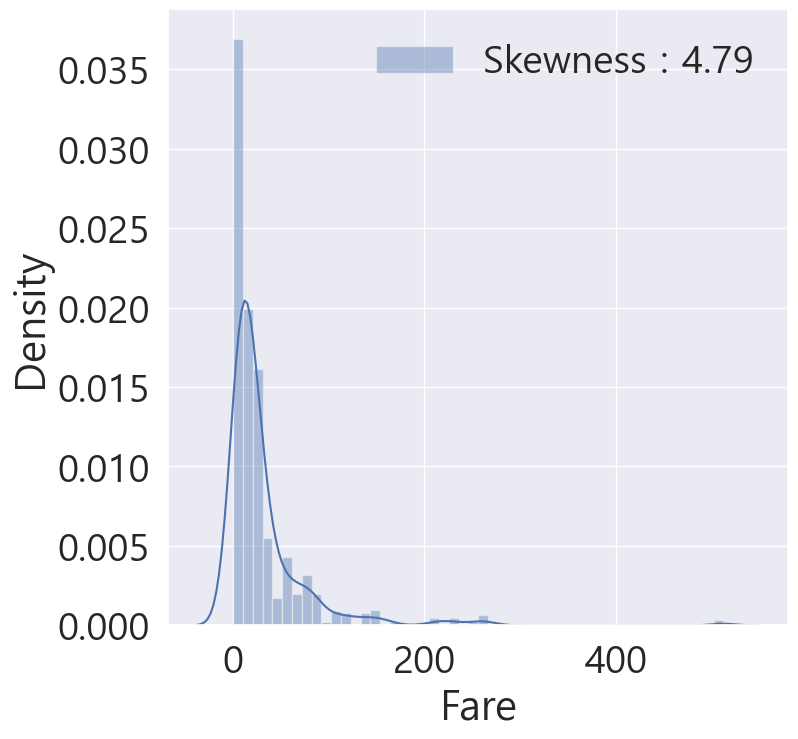

In [176]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

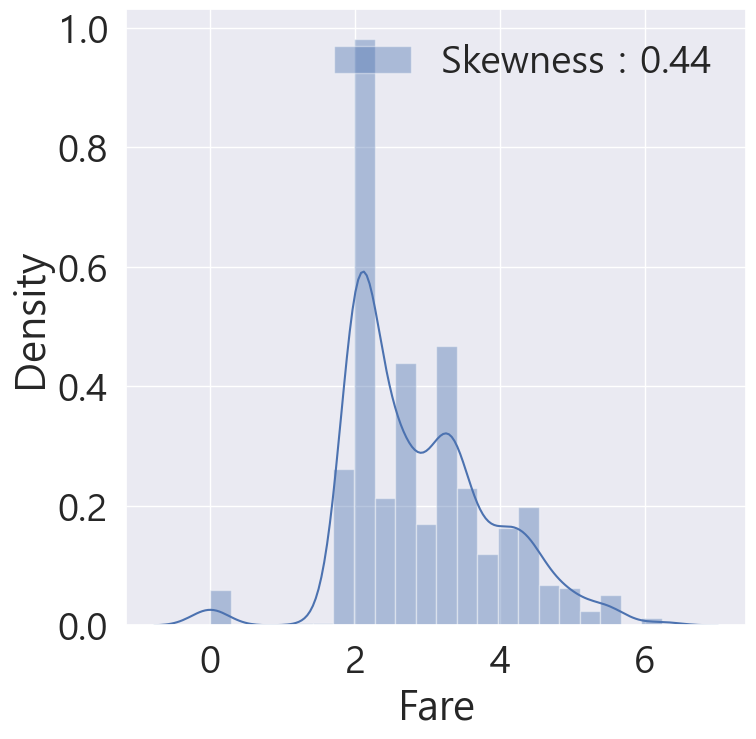

In [177]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() # testset 에 있는 nan value 를 평균값으로 치환합니다.

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

## 2.9 Cabin
- 결측치가 80%이상이라 정보확인만

## 2.10 Ticket


In [178]:
df_train['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64